# Health Care Quality and Inclusivity
As the health care industry continue to grow at an immense rate, it is paramount to ensure that safe, effective, and inclusive care is being provided to improve health outcomes of all populations. The arise of large, conglomerate health care systems with significant finanicial interests furthers the necessity of monitoring health outcome metrics and social responsibility to safegaurd against inequitable care.

The [Lown Institute Hospital Index](https://lownhospitalsindex.org/rankings/) is a dataset which seeks to do this through the ranking of US hospitals on over 50 benchmarks. Subsequently, the Lown Index highlights exceptionally performing hospitals, in addition to facilities performing beneath national averages. Details of the data set, as well as exclusion criteria, can be seen [here](https://lownhospitalsindex.org/about/faqs/). 

This notebook will explore the Lown Index and investigate possible relationships between a hospital's attributes and its' performance on Lown benchmarks using Pandas, matplotlib, and ..{{{}}}

---

In [33]:
#import libraries and set display options for improved readability
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import hvplot.pandas


pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [34]:
#Create dataframe
path = '2023_lown_index.xlsx'
lown_df_pre = pd.read_excel(path)

print(lown_df.shape)

(3922, 36)


**Cleaning Data:** The Lown Index has a 'Notes' column which specifies that four hospitals closed during the data collection period and will be discarded. Additionally, the data set includes entire hospital systems in addition to their constituent hospitals: these systems will be removed as they possess a seperate ranking system.

In [35]:
lown_df = lown_df[lown_df.NOTES != 'Hospital has closed since our data period.']
lown_df = lown_df[lown_df.HOSPITAL_SYSTEM != 'Y']

#viewing that all HOSPITAL_SYSTEM values are 'N' and no 'Y's remain
lown_df['HOSPITAL_SYSTEM'].value_counts()

HOSPITAL_SYSTEM
N    3922
Name: count, dtype: int64

**Excess Columns:** The Lown Index consists of nearly 120 different grades, numeric, and star rankings, many of which will not be used in this notebook. Below, unneeded columns are removed.

In [42]:
del_columns = ['SYSTEM_ID', 'Address', 'City', 'HRRName', 'HRRCode', 'COVID19_max_covid_burden_pc', 'COVID19_covid_burden_thresh_wks', 'COVID19_reported_wks', 'TYPE_isSafetyNet', 'TIER_1_GRADE_Lown_Composite', 'TIER_2_GRADE_Outcome', 'TIER_2_GRADE_Value', 'TIER_2_GRADE_Civic', 'TIER_3_GRADE_Outcome', 'TIER_3_RANK_OU', 'TIER_3_RANK_Cost_Eff', 'TIER_4_RANK_Outcome_INHOSP_MORT', 'TIER_4_RANK_Outcome_30DY_READM', 'TIER_4_RANK_Outcome_07DY_READM', 'TIER_4_RANK_Pat_Saf_CLABSI', 'TIER_4_RANK_Pat_Saf_CAUTI', 'TIER_4_RANK_Pat_Saf_SSI', 'TIER_4_RANK_Pat_Saf_MRSA', 'TIER_4_RANK_Pat_Saf_C_Diff', 'TIER_4_RANK_Pat_Exp_Nurs_Comm', 'TIER_4_RANK_Pat_Exp_Doc_Comm', 'TIER_4_RANK_Pat_Exp_Resp', 'TIER_4_RANK_Pat_Exp_Comm_Med', 'TIER_4_RANK_Pat_Exp_Dschg', 'TIER_4_RANK_Pat_Exp_Care', 'TIER_4_RANK_Pat_Exp_Clean', 'TIER_4_RANK_Pat_Exp_Quiet', 'TIER_4_RANK_Pat_Exp_Reco', 'TIER_4_RANK_Overuse_arth', 'TIER_4_RANK_Overuse_cea', 'TIER_4_RANK_Overuse_ctdsync', 'TIER_4_RANK_Overuse_eeg', 'TIER_4_RANK_Overuse_eegsync', 'TIER_4_RANK_Overuse_colon', 'TIER_4_RANK_Overuse_ivc', 'TIER_4_RANK_Overuse_lamsf', 'TIER_4_RANK_Overuse_pci', 'TIER_4_RANK_Overuse_renlstent', 'TIER_4_RANK_Overuse_sync', 'TIER_4_RANK_Overuse_vert', 'TIER_4_RANK_Cost_Eff_30DY', 'TIER_4_RANK_Cost_Eff_90DY', 'TIER_3_GRADE_Pat_Saf', 'TIER_3_GRADE_Pat_Exp', 'TIER_3_GRADE_OU', 'TIER_3_GRADE_Cost_Eff', 'TIER_3_GRADE_Exec_Comp', 'TIER_3_GRADE_CB', 'TIER_3_GRADE_Inclusivity', 'TIER_4_STARS_Outcome_30DY_MORT', 'TIER_4_STARS_Outcome_90DY_MORT', 'TIER_4_STARS_Outcome_INHOSP_MORT', 'TIER_4_STARS_Outcome_30DY_READM', 'TIER_4_STARS_Outcome_07DY_READM', 'TIER_4_STARS_Pat_Saf_CLABSI', 'TIER_4_STARS_Pat_Saf_CAUTI', 'TIER_4_STARS_Pat_Saf_SSI', 'TIER_4_STARS_Pat_Saf_MRSA', 'TIER_4_STARS_Pat_Saf_PSI_90', 'TIER_4_STARS_Pat_Saf_C_Diff', 'TIER_4_STARS_Pat_Exp_Nurs_Comm', 'TIER_4_STARS_Pat_Exp_Doc_Comm', 'TIER_4_STARS_Pat_Exp_Resp', 'TIER_4_STARS_Pat_Exp_Comm_Med', 'TIER_4_STARS_Pat_Exp_Dschg', 'TIER_4_STARS_Pat_Exp_Care', 'TIER_4_STARS_Pat_Exp_Clean', 'TIER_4_STARS_Pat_Exp_Quiet', 'TIER_4_STARS_Pat_Exp_Overall', 'TIER_4_STARS_Pat_Exp_Reco', 'TIER_4_STARS_Overuse_arth', 'TIER_4_STARS_Overuse_cea', 'TIER_4_STARS_Overuse_ctdsync', 'TIER_4_STARS_Overuse_eeg', 'TIER_4_STARS_Overuse_eegsync', 'TIER_4_STARS_Overuse_colon', 'TIER_4_STARS_Overuse_ivc', 'TIER_4_STARS_Overuse_lamsf', 'TIER_4_STARS_Overuse_pci', 'TIER_4_STARS_Overuse_renlstent', 'TIER_4_STARS_Overuse_sync', 'TIER_4_STARS_Overuse_vert', 'TIER_4_STARS_Cost_Eff_30DY', 'TIER_4_STARS_Cost_Eff_90DY', 'TIER_4_STARS_Exec_Comp_HC_worker_wg', 'TIER_4_STARS_CharityCare_Tot_Exp', 'TIER_4_STARS_Other_CB_Tot_Exp', 'TIER_4_STARS_CB_using_Medicaid', 'TIER_4_STARS_Inclusivity_Income', 'TIER_4_STARS_Inclusivity_Race', 'TIER_4_STARS_Inclusivity_Education', 'TIER_4_RANK_Pat_Saf_CLABSI', 'TIER_4_RANK_Pat_Saf_CAUTI', 'TIER_4_RANK_Pat_Saf_SSI', 'TIER_4_RANK_Pat_Saf_MRSA', 'TIER_4_RANK_Pat_Saf_C_Diff', 'TIER_4_RANK_Pat_Exp_Nurs_Comm', 'TIER_4_RANK_Pat_Exp_Doc_Comm', 'TIER_4_RANK_Pat_Exp_Resp', 'TIER_4_RANK_Pat_Exp_Comm_Med', 'TIER_4_RANK_Pat_Exp_Dschg', 'TIER_4_RANK_Pat_Exp_Care', 'TIER_4_RANK_Pat_Exp_Clean', 'TIER_4_RANK_Pat_Exp_Quiet', 'TIER_4_RANK_Overuse_arth', 'TIER_4_RANK_Overuse_cea', 'TIER_4_RANK_Overuse_ctdsync', 'TIER_4_RANK_Overuse_eeg', 'TIER_4_RANK_Overuse_eegsync', 'TIER_4_RANK_Overuse_colon', 'TIER_4_RANK_Overuse_ivc', 'TIER_4_RANK_Overuse_lamsf', 'TIER_4_RANK_Overuse_pci', 'TIER_4_RANK_Overuse_renlstent', 'TIER_4_RANK_Overuse_sync', 'TIER_4_RANK_Overuse_vert', 'NOTES']
lown_df = lown_df_pre.drop(columns=del_columns)

In [43]:
#97 columns removed
print(lown_df.shape)

(4222, 35)


In [38]:
print(lown_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RECORD_ID                           4222 non-null   object 
 1   HOSPITAL_SYSTEM                     4222 non-null   object 
 2   Name                                4222 non-null   object 
 3   State                               4222 non-null   object 
 4   Zip                                 4222 non-null   object 
 5   Size                                4222 non-null   object 
 6   TYPE_HospTyp_ACH                    3926 non-null   float64
 7   TYPE_HospTyp_CAH                    3926 non-null   float64
 8   TYPE_AMC                            3926 non-null   float64
 9   TYPE_ForProfit                      4216 non-null   float64
 10  TYPE_NonProfit                      4216 non-null   float64
 11  TYPE_chrch_affl_f                   3926 no

In [39]:
#Zip codes with leading zeros were lost, so casting them as string and adding a leading zero to strings that are 4 characters long
lown_df['Zip'] = lown_df['Zip'].astype(str)

lown_df['Zip'] = lown_df['Zip'].apply(lambda x: x if len(x) == 5 else '0' + x)

#No strings of 4 characters remain
lown_df['Zip'].str.len().min()

5

**Addressing Nulls:** Based on the Lown Index inclusion criteria for hospitals, many facilities are forgone because they are too small or are a surgical specialty facility. Once included in the Index, some hospitals may not receive a ranking in certain categories because of limited or missing data, and are therefore left null. Many of the statistical methods employed in this notebook will analyze ranking categories in isolation, so removing rows based on null values would eliminate otherwise useful data points. Prior to each statistic, the rows of null values will be addressed.

In [44]:
#Quantifying null values
print(lown_df.isna().sum())

RECORD_ID                                0
HOSPITAL_SYSTEM                          0
Name                                     0
State                                    0
Zip                                      0
Size                                     0
TYPE_HospTyp_ACH                       296
TYPE_HospTyp_CAH                       296
TYPE_AMC                               296
TYPE_ForProfit                           6
TYPE_NonProfit                           6
TYPE_chrch_affl_f                      296
TYPE_urban                             296
TYPE_rural                             296
TIER_1_RANK_Lown_Composite             289
TIER_2_RANK_Outcome                    241
TIER_2_RANK_Value                      289
TIER_2_RANK_Civic                        0
TIER_3_RANK_Outcome                    241
TIER_3_RANK_Pat_Saf                   1671
TIER_3_RANK_Pat_Exp                    548
TIER_3_RANK_Exec_Comp                    3
TIER_3_RANK_CB                         150
TIER_3_RANK

In [41]:
#Viewing quartile ranges of ranking benchmarks

lown_df.describe()

,TYPE_HospTyp_ACH,TYPE_HospTyp_CAH,TYPE_AMC,TYPE_ForProfit,TYPE_NonProfit,TYPE_chrch_affl_f,TYPE_urban,TYPE_rural,TIER_1_RANK_Lown_Composite,TIER_2_RANK_Outcome,...,TIER_4_RANK_Outcome_90DY_MORT,TIER_4_RANK_Pat_Saf_PSI_90,TIER_4_RANK_Pat_Exp_Overall,TIER_4_RANK_Exec_Comp_HC_worker_wg,TIER_4_RANK_CharityCare_Tot_Exp,TIER_4_RANK_Other_CB_Tot_Exp,TIER_4_RANK_CB_using_Medicaid,TIER_4_RANK_Inclusivity_Income,TIER_4_RANK_Inclusivity_Race,TIER_4_RANK_Inclusivity_Education
count,3926.00,3926.00,3926.00,4216.00,4216.00,3926.00,3926.00,3926.00,3933.00,3981.00,...,3981.00,2995.00,3674.00,4219.00,4066.00,2819.00,4096.00,3828.00,3440.00,3828.00
mean,0.72,0.28,0.05,0.13,0.87,0.12,0.60,0.40,1693.28,1717.01,...,1717.01,1232.86,1566.19,1834.77,1761.61,1169.10,1778.17,1642.23,1451.63,1642.23
std,0.45,0.45,0.22,0.33,0.33,0.32,0.49,0.49,1102.01,1116.22,...,1116.22,823.06,1025.44,1186.55,1141.97,777.44,1151.24,1071.12,956.09,1071.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,688.00,700.00,...,700.00,455.50,624.25,759.50,724.25,439.50,733.75,662.75,566.75,662.75
50%,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1671.00,1695.00,...,1695.00,1204.00,1542.50,1814.00,1740.50,1144.00,1757.50,1619.50,1426.50,1619.50
75%,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,2654.00,2690.00,...,2690.00,1952.50,2460.75,2868.50,2756.75,1848.50,2781.25,2576.25,2286.25,2576.25
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3637.00,3685.00,...,3685.00,2701.00,3379.00,3923.00,3773.00,2553.00,3805.00,3533.00,3146.00,3533.00


## Top Ten Overall Hospitals on the Lown Index

In [45]:
lown_df[['RECORD_ID', 'Name', 'State', 'Zip', 'TIER_1_RANK_Lown_Composite']].nsmallest(10, 'TIER_1_RANK_Lown_Composite')

,RECORD_ID,Name,State,Zip,TIER_1_RANK_Lown_Composite
2587,340155,Duke Regional Hospital,NC,27704,1.00
3990,LHS0000127,Lee Health,FL,33908-7603,1.00
545,60131,UCHealth Greeley Hospital,CO,80634,2.00
4207,LHS0000055,Centra Health,VA,24501-1109,2.00
3305,450124,Dell Seton Medical Center at the University of...,TX,78701,3.00
4107,LHS0000168,Nebraska Medicine,NE,68198-7400,3.00
541,60119,UCHealth Medical Center of the Rockies,CO,80538,4.00
3964,LHS0000203,Prospect Medical Holdings,"CA,CT,PA,RI",90025,4.00
3195,440046,Tristar Horizon Medical Center,TN,37055,5.00
3985,LHS0000147,MedStar Health,"DC,MD",21044-2665,5.00


In [46]:
#Get top 10th percentile of hospitals
tenth = lown_df.TIER_1_RANK_Lown_Composite.quantile(0.1)

#New dataframe to preserve orignal for future analysis, comprised of only top tenth percentile
top_tenth_df = lown_df[lown_df['TIER_1_RANK_Lown_Composite'] < tenth]

#Creating two dictionaries to hold count and percentage of hospitals of a state that are in the top 10th percentile
top = (top_tenth_df['State'].value_counts()/lown_df['State'].value_counts()).to_dict()
top1 = top_tenth_df.value_counts('State')

In [47]:
#Dataframe to hold count and percentage of top hospitals per state
states = lown_df.State.unique()
top_df = pd.DataFrame(states)
top_df.columns = ['State']

#Assigning values from dictionaries to corresponding state
top_df['top_10th'] = top_df['State'].apply(lambda x: top.get(x)*100)
top_df['top_hosp'] = top_df['State'].apply(lambda x: top1.get(x))
top_df = top_df.fillna(0)

## Amount of hospitals performing in the top 10th percentile
A dual-Y axis bar plot is used to display Midwest states with the highest count and percentage of hospitals in the top 10th percentile. We can see states such as Iowa and Kansas lagging when compared to their counterparts.

In [48]:
#Defining Midwest states and preapring dataframe to be plotted
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
top_df = top_df[top_df['State'].isin(midwest)]
top_df = top_df.set_index('State')

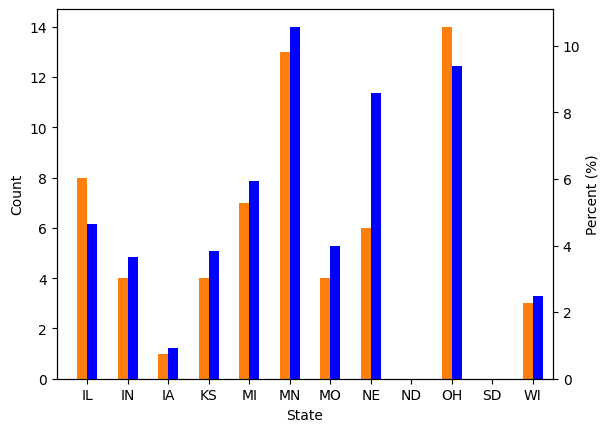

In [49]:
top_fig = plt.figure()

#Establishing two Y-axes
ax1 = top_fig.add_subplot()
ax2 = ax1.twinx()

width = 0.25
top_df.top_hosp.plot(kind='bar', color='tab:orange', width=width, ax=ax1, position=1, rot=0)
top_df.top_10th.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, rot=0)

#Improving readbility
ax1.set_xlim(-.75, 11.5)
ax1.set_ylabel('Count')
ax2.set_ylabel('Percent (%)')

plt.show()

**Overall Inclusivity:** By combining racial, economic, and educational inclusivity measures, the Lown Index creates an overall inclusivity ranking for hospitals. To get an overview of inclusivity in the Midwest, we will create boxplots to view the distribution of rankings by state.

In [50]:
#Creating a dictionary to hold a list of rankings with states as keys
midwest_dict = {key: None for key in midwest}

#Looping to update dictionary with ranking data
for i in midwest:
    incl_list = list(lown_df[lown_df['State'] == i]['TIER_3_RANK_Inclusivity'])
    incl_list = [i for i in incl_list if str(i) != 'nan']
    midwest_dict.update({i:incl_list})

<Axes: >

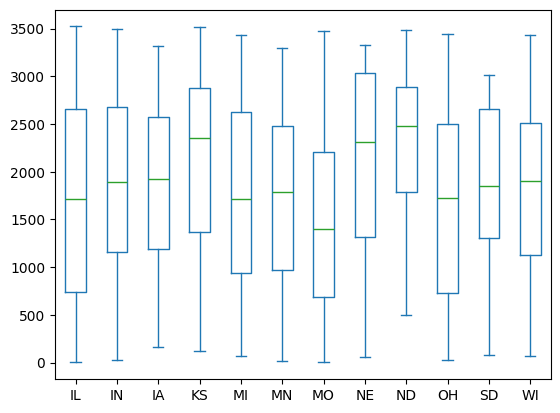

In [51]:
#Creating dataframe to fill with data from dictionary. Unable to convert the dictionary directly to dataframe due to unequal list lengths
incl_df = pd.DataFrame()

#Loop to concatenate series together, as this method allows for unequal lengths (certain states have more rankings that others)
for i in midwest:
    midwest_ser = pd.Series(midwest_dict[i])
    incl_df = pd.concat([incl_df, midwest_ser], axis = 1)
    
#Rename columns
incl_df.columns = midwest

incl_df.plot.box()

Above, we can see that all states have a large distribution of rankings, with similar interquartile ranges. Some prarie states have median values above their eastern counterparts, such as Kansas, Nebraska, and North Dakota.

## Checking for Correlation
The Lown Index provides us with several novel and intriguing metrics; some that highlight common themes seen in news headlines. Particularly, the executive pay metric compares the adjusted hourly salary of CEOs compared to employees in positions that don't require a terminal degree. I hypothesize that hospitals with a poor rating in this metric will likely have better mortality rankings because it is indicative of high revenue and investment, with for-profit facilities performing above non-profits. We'll create a scatterplot to test this assertion.

In [53]:
#Building two scatterplots and alligning them horizontally
pt_exp_forprofit = lown_df.hvplot.scatter(x='TIER_4_RANK_Exec_Comp_HC_worker_wg', y='TIER_3_RANK_Pat_Exp', by='TYPE_ForProfit', xlabel = 'CEO vs Worker Pay Rank', ylabel = 'Overall Pt Experience', s = 10, hover_cols=["Name", "State", "TIER_3_RANK_Pat_Exp", "TIER_4_RANK_Exec_Comp_HC_worker_wg"])
mortality_forprofit = lown_df.hvplot.scatter(x='TIER_4_RANK_Exec_Comp_HC_worker_wg', y='TIER_4_RANK_Outcome_30DY_MORT', by='TYPE_ForProfit', xlabel = 'CEO vs Worker Pay Rank', ylabel = '30 Day Mortality Ranking', s = 10, hover_cols=["Name", "State", "TIER_3_RANK_Pat_Exp", "TIER_4_RANK_Exec_Comp_HC_worker_wg"])

pt_exp_forprofit + mortality_forprofit

:Layout
   .NdOverlay.I  :NdOverlay   [TYPE_ForProfit]
      :Scatter   [TIER_4_RANK_Exec_Comp_HC_worker_wg]   (TIER_3_RANK_Pat_Exp,Name,State)
   .NdOverlay.II :NdOverlay   [TYPE_ForProfit]
      :Scatter   [TIER_4_RANK_Exec_Comp_HC_worker_wg]   (TIER_4_RANK_Outcome_30DY_MORT,Name,State,TIER_3_RANK_Pat_Exp)

**Interesting;** in the first scatterplot above, we see that for-profit facilities have a higher (worse) ranking in CEO vs Worker Pay discrepancy than non-profits, while simultaneously having worse overall patient experience, as indicated by the strong cluster of red in the upper right of the plot. Although patient experience was worse with for-profits, we see that the 30 day mortality ranking is better. Below, we'll see how pay discrepancy compares to 30 day mortality and patient experience if a facility is an academic medical center. 

In [54]:
pt_exp_amc = lown_df.hvplot.scatter(x='TIER_4_RANK_Exec_Comp_HC_worker_wg', y='TIER_3_RANK_Pat_Exp', by='TYPE_AMC', xlabel = 'CEO vs Worker Pay Rank', ylabel = 'Overall Pt Experience', s = 10, hover_cols=["Name", "State", "TIER_3_RANK_Pat_Exp", "TIER_4_RANK_Exec_Comp_HC_worker_wg"])
mortality_amc = lown_df.hvplot.scatter(x='TIER_4_RANK_Exec_Comp_HC_worker_wg', y='TIER_4_RANK_Outcome_30DY_MORT', by='TYPE_AMC', xlabel = 'CEO vs Worker Pay Rank', ylabel = '30 Day Mortality Ranking', s = 10, hover_cols=["Name", "State", "TIER_3_RANK_Pat_Exp", "TIER_4_RANK_Exec_Comp_HC_worker_wg"])

pt_exp_amc + mortality_amc

:Layout
   .NdOverlay.I  :NdOverlay   [TYPE_AMC]
      :Scatter   [TIER_4_RANK_Exec_Comp_HC_worker_wg]   (TIER_3_RANK_Pat_Exp,Name,State)
   .NdOverlay.II :NdOverlay   [TYPE_AMC]
      :Scatter   [TIER_4_RANK_Exec_Comp_HC_worker_wg]   (TIER_4_RANK_Outcome_30DY_MORT,Name,State,TIER_3_RANK_Pat_Exp)

**Unlike profit status,** we see the AMC status does not correlate with overall patient experience, as indicated by the vertical spread of red data points in the right-most plot. Alternately, AMC's appear to have consistently better 30 day mortality rankings 

**Hospital Size and 30 Day Mortality:** In addition to the variables above, hospital size also correlates strongly with mortality rankings. Although fear-inducing, this may be explained by a lack of funding, resources, and practioner acuity experience.

In [28]:
lown_df.hvplot.scatter(x='TIER_4_RANK_Exec_Comp_HC_worker_wg', y='TIER_4_RANK_Outcome_30DY_MORT', by='Size', xlabel = 'Hospital Size', ylabel = '30 Day Mortality Ranking', s = 10, hover_cols=["Name", "State", "TIER_3_RANK_Pat_Exp", "TIER_4_RANK_Exec_Comp_HC_worker_wg"])
lown_df.hvplot.scatter(x='TIER_4_RANK_Exec_Comp_HC_worker_wg', y='TIER_4_RANK_Outcome_30DY_MORT', by='Size', xlabel = 'Hospital Size', ylabel = '30 Day Mortality Ranking', s = 10, hover_cols=["Name", "State", "TIER_3_RANK_Pat_Exp", "TIER_4_RANK_Exec_Comp_HC_worker_wg"])

:NdOverlay   [Size]
   :Scatter   [TIER_4_RANK_Exec_Comp_HC_worker_wg]   (TIER_4_RANK_Outcome_30DY_MORT,Name,State,TIER_3_RANK_Pat_Exp)